In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ball = pd.read_csv('ball_by_ball_data.csv')
matches = pd.read_csv('match_data.csv')
player = pd.read_csv('player_rosters.csv')

In [3]:
#Total venues played.
print(matches['city'].nunique()) 

30


In [4]:
#total umpires.
print(matches['umpire1'].nunique()) 

44


In [5]:
#most man of the match awards.
print((matches['player_of_match'].value_counts()).idxmax()) 

Chris Gayle


In [6]:
#the highest number of match wins.
print(((matches['winner']).value_counts()).idxmax()) 

MI


In [7]:
#max win by runs.
df=matches.iloc[[matches['win_by_runs'].idxmax()]]
df[['season','team1_id','team2_id','winner','win_by_runs']]

,season,team1_id,team2_id,winner,win_by_runs
620,2017,MI,DD,MI,146


In [8]:
#max win by wicket.
df=matches.iloc[[matches['win_by_wickets'].idxmax()]]
df[['season','team1_id','team2_id','winner','win_by_wickets']]

,season,team1_id,team2_id,winner,win_by_wickets
12,2008,MI,DC,DC,10


In [9]:
#% of team opting batting / fielding.
(matches['toss_decision']).value_counts()/637*100  

field    56.985871
bat      42.857143
Name: toss_decision, dtype: float64

In [10]:
import seaborn as sns

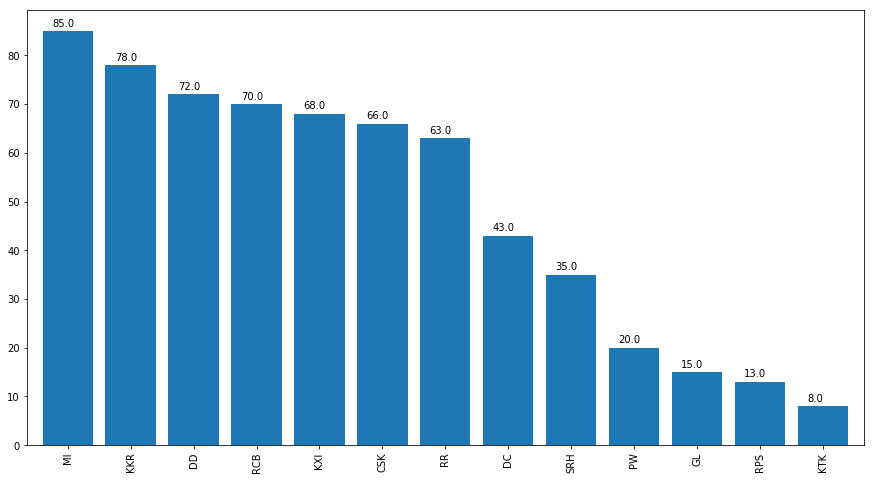

In [11]:
#team wise toss winer.
plt.subplots(figsize=(15,8))
ax=(matches['toss_winner'].value_counts()).plot.bar(width=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [12]:
#team wise % of toss and match winner. 
matches[matches['toss_winner']==matches['winner']]['winner'].value_counts()/matches['toss_winner'].value_counts()*100

CSK    63.636364
DC     44.186047
DD     45.833333
GL     66.666667
KKR    56.410256
KTK    50.000000
KXI    41.176471
MI     56.470588
PW     15.000000
RCB    50.000000
RPS    61.538462
RR     53.968254
SRH    48.571429
dtype: float64

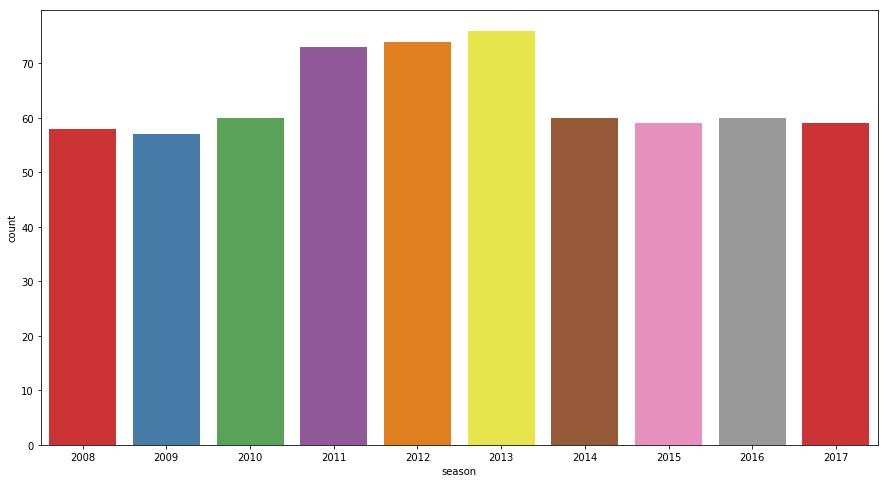

In [13]:
#matches season wises.
plt.subplots(figsize=(15,8))
sns.countplot(x='season',data=matches,palette="Set1")  
plt.show()

In [14]:
#runs each season.
batsmen = matches[['match_id','season']].merge(ball, left_on = 'match_id', right_on = 'match_id', how = 'left')
runs_each_season=batsmen.groupby(['season'])['batsman_runs'].sum()
runs_each_season 

season
2008    16809
2009    15376
2010    17754
2011    19928
2012    21322
2013    21487
2014    17943
2015    17427
2016    17963
2017    17920
Name: batsman_runs, dtype: int64

In [15]:
matches_each_season=matches.groupby(['season']).count().match_id

In [16]:
matches_each_season

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
Name: match_id, dtype: int64

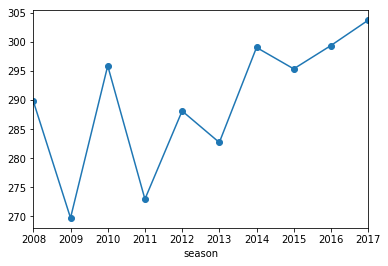

In [17]:
#season wise runs per match.
(runs_each_season/matches_each_season).plot(marker='o')
plt.show()

In [18]:
six=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum())
four=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum())

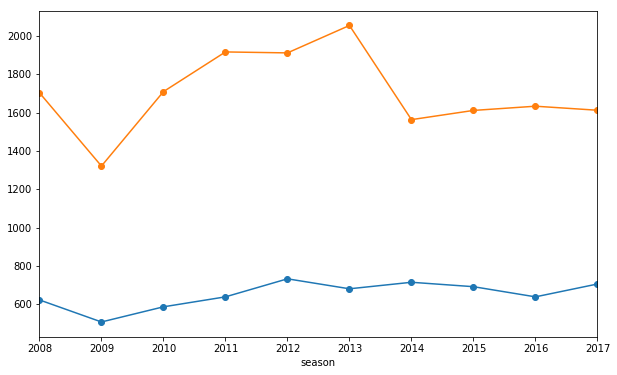

In [19]:
#sixes & foures season wise.
six.plot(marker='o')
four.plot(marker='o')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [20]:
#season wise winner.
for i in range(2008,2017):
    df=((matches[matches['season']==i]).iloc[-1]) 
    print(df[[1,10]])

season    2008
winner      RR
Name: 57, dtype: object
season    2009
winner      DC
Name: 114, dtype: object
season    2010
winner     CSK
Name: 174, dtype: object
season    2011
winner     CSK
Name: 247, dtype: object
season    2012
winner     KKR
Name: 321, dtype: object
season    2013
winner      MI
Name: 397, dtype: object
season    2014
winner     KKR
Name: 457, dtype: object
season    2015
winner      MI
Name: 516, dtype: object
season    2016
winner     SRH
Name: 576, dtype: object


In [21]:
ball[ball['is_super_over']==1]['match_id'].nunique()

7

In [22]:
mt1=matches[((matches['team1_id']=='CSK')|(matches['team2_id']=='CSK'))&((matches['team1_id']=='MI')|(matches['team2_id']=='MI'))]

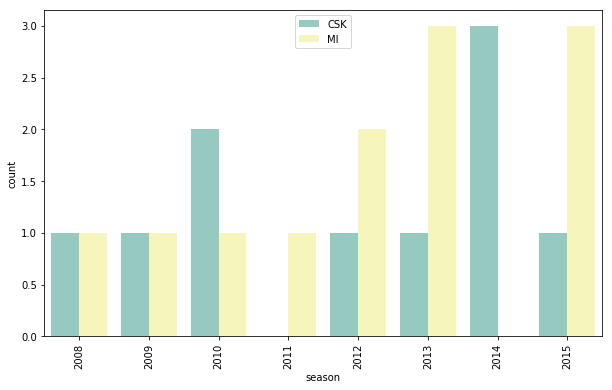

In [23]:
#csk vs mi season wise.
sns.countplot(x='season', hue='winner',data=mt1,palette='Set3')
plt.xticks(rotation='vertical')
leg = plt.legend( loc = 'upper center')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [24]:
ball['total_runs']= ball['batsman_runs']+ball['extra_runs']
xyz=ball.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()

In [25]:
xyz.drop('match_id',axis=1,inplace=True)

In [26]:
xyz = xyz.groupby(['inning','batting_team'])['total_runs'].mean().reset_index()

In [27]:
innings_one = xyz[xyz['inning']==1]

In [28]:
innings_one.drop('inning',axis=1,inplace=True)

C:\Users\HP\Anaconda3_5\envs\py35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
innings_one

,batting_team,total_runs
0,CSK,164.844156
1,DC,157.325581
2,DD,152.777778
3,GL,161.928571
4,KKR,155.029412
5,KTK,144.142857
6,KXI,159.584416
7,MI,163.256098
8,PW,148.650000
9,RCB,167.214286


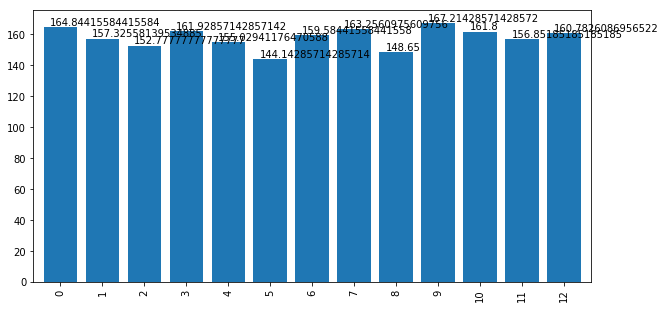

In [30]:
plt.subplots(figsize=(10,5))
ax=(innings_one['total_runs']).plot.bar(width=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [31]:
innings_two = xyz[xyz['inning']==2]

In [32]:
innings_two

,inning,batting_team,total_runs
13,2,CSK,151.796296
14,2,DC,146.812500
15,2,DD,146.630952
16,2,GL,161.812500
17,2,KKR,142.462500
18,2,KTK,127.428571
19,2,KXI,151.478873
20,2,MI,148.306667
21,2,PW,135.400000
22,2,RCB,142.695122


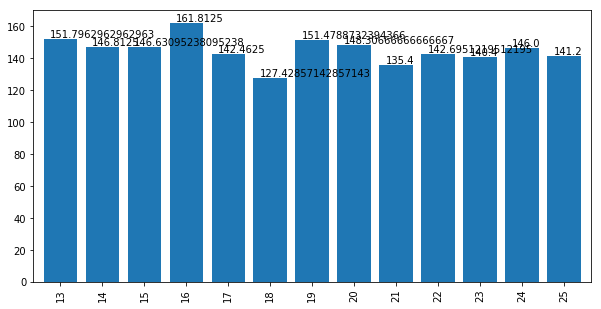

In [33]:
plt.subplots(figsize=(10,5))
ax=(innings_two['total_runs']).plot.bar(width=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [34]:
#team that scored 200+ scores.
high_scores=ball.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()

In [35]:
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
695,2013_30,1,RCB,PW,263
1120,2016_44,1,RCB,GL,248
284,2010_32,1,CSK,RR,246
22,2008_2,1,CSK,KXI,240
1004,2015_45,1,RCB,MI,235
470,2011_62,1,KXI,RCB,232
388,2011_25,1,DD,KXI,231
847,2014_29,1,KXI,CSK,231
1256,2017_50,1,KXI,MI,230
1110,2016_4,1,RCB,SRH,227


In [36]:
chance = matches[['match_id','winner']].merge(ball, left_on = 'match_id', right_on = 'match_id', how = 'left')

In [37]:
#matches in which team chase down 200+ score.
chance = chance.groupby(['winner','match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
chance[((chance['total_runs'] >= 200)&(chance['inning']==1))&(chance['winner']==chance['bowling_team'])]

,winner,match_id,inning,batting_team,bowling_team,total_runs
74,CSK,2012_13,1,RCB,CSK,205
332,DD,2017_41,1,GL,DD,208
570,KXI,2010_34,1,KKR,KXI,200
628,KXI,2014_3,1,CSK,KXI,205
632,KXI,2014_39,1,SRH,KXI,205
926,RCB,2010_7,1,KXI,RCB,203
1088,RR,2008_9,1,DC,RR,214


## Batting analysis.

In [38]:
#top 10 striker with 500+ runs.
balls=ball.groupby(['batsman'])['ball'].count().reset_index()
runs=ball.groupby(['batsman'])['batsman_runs'].sum().reset_index()
strike_rate = pd.DataFrame()
strike_rate['batsman'] = runs['batsman']
strike_rate['strike_rate'] = runs['batsman_runs']/balls['ball']*100
batsman =strike_rate.merge(runs, left_on ='batsman', right_on = 'batsman', how = 'left')
batsman[batsman['batsman_runs']>=500].nlargest(10,'strike_rate')

,batsman,strike_rate,batsman_runs
33,Andre Russell,164.000000,574
144,Glenn Maxwell,157.564103,1229
444,Virender Sehwag,148.827059,2728
326,Rishabh Pant,148.031496,564
0,AB De Villiers,145.129059,3486
91,Chris Gayle,144.194313,3651
188,Jos Buttler,140.800000,528
457,Yusuf Pathan,140.751445,2922
206,Kieron Pollard,140.621266,2354
111,David Warner,138.318401,4014


In [39]:
#top 10 run scorer.
batsman =batsman.merge(balls, left_on ='batsman', right_on = 'batsman', how = 'left')
batsman.nlargest(10,'batsman_runs')

,batsman,strike_rate,batsman_runs,ball
407,Suresh Raina,134.995548,4548,3369
443,Virat Kohli,126.588437,4423,3494
334,Rohit Sharma,128.497251,4207,3274
142,Gautam Gambhir,120.361200,4132,3433
111,David Warner,138.318401,4014,2902
330,Robin Uthappa,127.635135,3778,2960
91,Chris Gayle,144.194313,3651,2532
375,Shikhar Dhawan,118.502496,3561,3005
224,Mahendra Singh Dhoni,132.835821,3560,2680
0,AB De Villiers,145.129059,3486,2402


#### adding 100's and 50's

In [40]:
batsman_match = ball.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index()
batsman2 = ball.groupby(['match_id','batsman']).count().reset_index()
batsman_match['ball'] = batsman2['inning']

In [41]:
hundred = batsman_match[batsman_match['batsman_runs']>=100].groupby(['batsman']).count().reset_index()
hundred = hundred[['batsman','batsman_runs']].rename(columns={'batsman_runs': 'hundreds'})

In [42]:
batsman =batsman.merge(hundred, left_on ='batsman', right_on = 'batsman', how = 'left')
batsman.head()

,batsman,strike_rate,batsman_runs,ball,hundreds
0,AB De Villiers,145.129059,3486,2402,3.0
1,Aakash Chopra,70.666667,53,75,NaN
2,Aaron Finch,126.299213,1604,1270,NaN
3,Abdur Razzak,0.000000,0,2,NaN
4,Abhimanyu Mithun,130.769231,34,26,NaN


In [43]:
fifty = batsman_match[(batsman_match['batsman_runs']<100)&(batsman_match['batsman_runs']>=50)].groupby(['batsman']).count().reset_index()
fifty = fifty[['batsman','batsman_runs']].rename(columns={'batsman_runs': 'fifty'})

In [44]:
batsman =batsman.merge(fifty, left_on ='batsman', right_on = 'batsman', how = 'left')
batsman.head()

,batsman,strike_rate,batsman_runs,ball,hundreds,fifty
0,AB De Villiers,145.129059,3486,2402,3.0,23.0
1,Aakash Chopra,70.666667,53,75,NaN,NaN
2,Aaron Finch,126.299213,1604,1270,NaN,13.0
3,Abdur Razzak,0.000000,0,2,NaN,NaN
4,Abhimanyu Mithun,130.769231,34,26,NaN,NaN


In [45]:
ab=ball['player_dismissed'].value_counts().reset_index()
batsman =batsman.merge(ab, left_on ='batsman', right_on = 'index', how = 'left')
batsman.drop(['index'],axis=1,inplace=True)

In [46]:
batsman['average'] = batsman['batsman_runs']/batsman['player_dismissed']

In [47]:
highest = batsman_match.groupby(['batsman'])['batsman_runs'].max().reset_index()
highest.head()

,batsman,batsman_runs
0,AB De Villiers,133
1,Aakash Chopra,24
2,Aaron Finch,88
3,Abdur Razzak,0
4,Abhimanyu Mithun,11


In [48]:
highest = highest.rename(columns={'batsman_runs': 'highest'})
batsman =batsman.merge(highest, left_on ='batsman', right_on = 'batsman', how = 'left')

In [49]:
batsman.head()

,batsman,strike_rate,batsman_runs,ball,hundreds,fifty,player_dismissed,average,highest
0,AB De Villiers,145.129059,3486,2402,3.0,23.0,91.0,38.307692,133
1,Aakash Chopra,70.666667,53,75,NaN,NaN,6.0,8.833333,24
2,Aaron Finch,126.299213,1604,1270,NaN,13.0,59.0,27.186441,88
3,Abdur Razzak,0.000000,0,2,NaN,NaN,NaN,NaN,0
4,Abhimanyu Mithun,130.769231,34,26,NaN,NaN,5.0,6.800000,11


In [50]:
#A class batsman.
A_batsman = batsman[((batsman['strike_rate']>=120)&(batsman['average']>=27))&(batsman['batsman_runs']>=500)]

In [51]:
A_batsman.head()

,batsman,strike_rate,batsman_runs,ball,hundreds,fifty,player_dismissed,average,highest
0,AB De Villiers,145.129059,3486,2402,3.0,23.0,91.0,38.307692,133
2,Aaron Finch,126.299213,1604,1270,NaN,13.0,59.0,27.186441,88
10,Adam Gilchrist,133.054662,2069,1555,2.0,11.0,76.0,27.223684,109
27,Ambati Rayudu,123.014257,2416,1964,NaN,14.0,89.0,27.146067,81
36,Andrew Symonds,124.711908,974,781,1.0,5.0,27.0,36.074074,117


In [52]:
#B class batsman.
B_batsman = batsman[((batsman['strike_rate']>=114)&((batsman['average']<=27)&(batsman['average']>=20)))&(batsman['batsman_runs']>=300)]     

In [53]:
B_batsman.head()

,batsman,strike_rate,batsman_runs,ball,hundreds,fifty,player_dismissed,average,highest
24,Albie Morkel,136.938202,975,712,NaN,3.0,40.0,24.375000,73
33,Andre Russell,164.000000,574,350,NaN,3.0,22.0,26.090909,66
38,Angelo Mathews,120.868114,724,599,NaN,1.0,31.0,23.354839,65
57,Axar Patel,122.672065,606,494,NaN,NaN,30.0,20.200000,44
59,Azhar Mahmood,124.758842,388,311,NaN,2.0,19.0,20.421053,80


In [57]:
#hitter/finisher or n0. 5 /6 batsman.
C_batsman = batsman[((batsman['strike_rate']>=140)&((batsman['average']<=22)))&(batsman['batsman_runs']>=100)]     

In [58]:
C_batsman.head()

,batsman,strike_rate,batsman_runs,ball,hundreds,fifty,player_dismissed,average,highest
53,Ashish Reddy,142.857143,280,196,NaN,NaN,15.0,18.666667,36
139,Farveez Maharoof,142.741935,177,124,NaN,NaN,10.0,17.700000,39
205,Kevon Cooper,165.714286,116,70,NaN,NaN,9.0,12.888889,32
222,Luke Wright,168.253968,106,63,NaN,NaN,5.0,21.200000,44
247,Misbah-ul-Haq,142.682927,117,82,NaN,NaN,7.0,16.714286,47


## Bowling analysis.

In [59]:
runs = ball.groupby(['bowler'])['total_runs'].sum().reset_index()

In [60]:
wicket = ball[ball['dismissal_kind'] != 'run out'].groupby(['bowler'])['player_dismissed'].count().reset_index()
wicket.head()

,bowler,player_dismissed
0,Aaron Finch,1
1,Aavishkar Salvi,7
2,Abdur Razzak,0
3,Abhimanyu Mithun,7
4,Abhishek Jhunjhunwala,1


In [61]:
ballas = ball['bowler'].value_counts().reset_index()
ballas =ballas.rename(columns={'index': 'bowler','bowler':'balls'})
ballas.head()

,bowler,balls
0,Harbhajan Singh,2989
1,Amit Mishra,2703
2,Lasith Malinga,2694
3,Praveen Kumar,2637
4,Piyush Chawla,2594


In [62]:
bowlers = pd.merge(ballas, wicket, on='bowler')

In [63]:
bowler = pd.merge(bowlers,runs,on='bowler')

In [64]:
bowler['eco'] = bowler['total_runs']/bowler['balls']*6
bowler['bowling_average'] =  bowler['total_runs']/bowler['player_dismissed']
bowler['wicket_rate'] =  bowler['balls']/bowler['player_dismissed']


In [65]:
bowler = bowler.rename(columns={'player_dismissed': 'wickets','total_runs':'runs_consided'})

In [66]:
bowler.head()

,bowler,balls,wickets,runs_consided,eco,bowling_average,wicket_rate
0,Harbhajan Singh,2989,127,3453,6.931415,27.188976,23.535433
1,Amit Mishra,2703,134,3305,7.336293,24.664179,20.171642
2,Lasith Malinga,2694,154,3034,6.757238,19.701299,17.493506
3,Praveen Kumar,2637,90,3342,7.604096,37.133333,29.300000
4,Piyush Chawla,2594,126,3315,7.667695,26.309524,20.587302


In [79]:
A_bowler = bowler[((bowler['bowling_average']<= 28)&(bowler['eco']<=8))&(bowler['balls']>=100)]

In [80]:
#A class bowler.
A_bowler.head()

,bowler,balls,wickets,runs_consided,eco,bowling_average,wicket_rate
0,Harbhajan Singh,2989,127,3453,6.931415,27.188976,23.535433
1,Amit Mishra,2703,134,3305,7.336293,24.664179,20.171642
2,Lasith Malinga,2694,154,3034,6.757238,19.701299,17.493506
4,Piyush Chawla,2594,126,3315,7.667695,26.309524,20.587302
5,Ravichandran Ashwin,2359,100,2552,6.490886,25.520000,23.590000


In [83]:
B_bowler = bowler[((bowler['bowling_average']>= 28)&(bowler['bowling_average']<= 35))&(bowler['balls']>=100)]

In [84]:
#B class bowler.
B_bowler.head()

,bowler,balls,wickets,runs_consided,eco,bowling_average,wicket_rate
7,Vinay Kumar,2161,103,2976,8.262841,28.893204,20.980583
9,Irfan Pathan,2113,80,2711,7.698060,33.887500,26.412500
12,Umesh Yadav,2033,91,2802,8.269552,30.791209,22.340659
14,Ravindra Jadeja,1962,82,2540,7.767584,30.975610,23.926829
15,Shane Watson,1961,86,2490,7.618562,28.953488,22.802326


similerly we can find economical bowler, opening wicket taker bowler.

## player analysis.

In [85]:
batsman_ = batsman.rename(columns={'batsman': 'bowler'})

In [86]:
player = pd.merge(bowler,batsman_,on='bowler', how='outer')

In [88]:
#stat of every player in ipl.
player.head()

,bowler,balls,wickets,runs_consided,eco,bowling_average,wicket_rate,strike_rate,batsman_runs,ball,hundreds,fifty,player_dismissed,average,highest
0,Harbhajan Singh,2989.0,127.0,3453.0,6.931415,27.188976,23.535433,135.194585,799.0,591.0,NaN,1.0,51.0,15.666667,64.0
1,Amit Mishra,2703.0,134.0,3305.0,7.336293,24.664179,20.171642,89.005236,340.0,382.0,NaN,NaN,29.0,11.724138,31.0
2,Lasith Malinga,2694.0,154.0,3034.0,6.757238,19.701299,17.493506,85.436893,88.0,103.0,NaN,NaN,16.0,5.500000,17.0
3,Praveen Kumar,2637.0,90.0,3342.0,7.604096,37.133333,29.300000,105.263158,340.0,323.0,NaN,NaN,38.0,8.947368,34.0
4,Piyush Chawla,2594.0,126.0,3315.0,7.667695,26.309524,20.587302,110.278373,515.0,467.0,NaN,NaN,42.0,12.261905,24.0


#### ALL ROUNDER

In [94]:
ALLR = player[(player['batsman_runs']>=600)&(player['balls']>=300)]

In [95]:
ALLR.head()

,bowler,balls,wickets,runs_consided,eco,bowling_average,wicket_rate,strike_rate,batsman_runs,ball,hundreds,fifty,player_dismissed,average,highest
0,Harbhajan Singh,2989.0,127.0,3453.0,6.931415,27.188976,23.535433,135.194585,799.0,591.0,NaN,1.0,51.0,15.666667,64.0
9,Irfan Pathan,2113.0,80.0,2711.0,7.698060,33.887500,26.412500,116.751269,1150.0,985.0,NaN,1.0,53.0,21.698113,60.0
10,Dwayne Bravo,2110.0,122.0,2815.0,8.004739,23.073770,17.295082,122.286822,1262.0,1032.0,NaN,4.0,55.0,22.945455,70.0
14,Ravindra Jadeja,1962.0,82.0,2540.0,7.767584,30.975610,23.926829,118.792867,1732.0,1458.0,NaN,NaN,72.0,24.055556,48.0
15,Shane Watson,1961.0,86.0,2490.0,7.618562,28.953488,22.802326,134.838379,2628.0,1949.0,2.0,14.0,85.0,30.917647,104.0
